# 2024-Spring Data Science Homework 3
## Due: 2024/04/19 23:59
### ID: 111590038
### Name: 卓柏辰 

### Import Library

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import calendar
import time


### 爬取一整年股票的資料

In [ ]:
def month_calendar(chinese_year, month):
    year = chinese_year + 1911
    calendar.setfirstweekday(6)
    date = str(calendar.month(year, month))
    day = date[38:].strip().replace('\n', ' ')
    day = day.replace('  ',' ').split(' ')
    return {month : day}

yearOfDay = []
for i in range(1, 13, 1):
    yearOfDay.append(month_calendar(112, i))

data = pd.DataFrame()
for dict in yearOfDay:
    for key, value in dict.items():
        for day in value:
            if int(day) < 10: day = "0" + day
            if key < 10: 
                date = "2023-" + "0" + str(key) + "-" + day
            else : 
                date = "2023-" + str(key) + "-" + day
            print(date + "\n--------")

            url = f'https://www.twse.com.tw/exchangeReport/MI_INDEX?response=json&date={date.replace('-', '')}&type=ALLBUT0999'
            req = requests.get(url)
            reqJson = req.json()
            if reqJson['stat'] == 'OK':
                stock = pd.DataFrame(reqJson['data9'], columns = reqJson['fields9'])
                stock['date'] = date 
                data = pd.concat([data, stock])
        time.sleep(5)

# write the data to my direction
data.to_csv('../DataScience/stock_data_2023.csv')

### Problem 1
請參考Lab5，繪製台積電在2023年的收盤價及開盤價的趨勢圖。

<Axes: title={'center': '2023 TSMC Stock chart'}, xlabel='date', ylabel='price'>

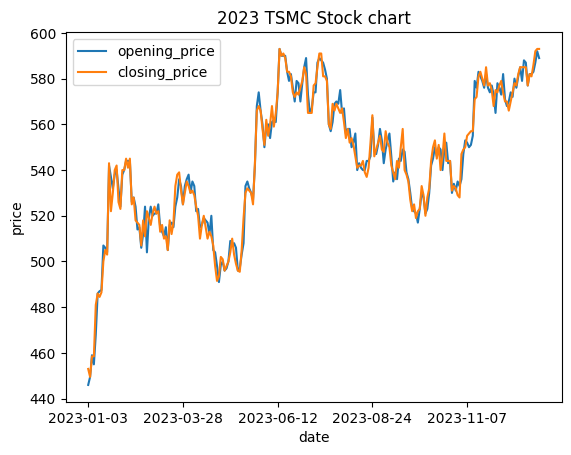

In [8]:
# 讀取dataset，並擷取所要的資料
stockData = pd.read_csv('C:\\Users\\bryan\\Desktop\\DataScience\\stock_data_2023.csv', index_col= 0)
stockData = stockData[['date', '證券名稱', '開盤價','收盤價']]
# 變更column的名稱
stockData = stockData.rename(columns= {'證券名稱':'name'})
stockData = stockData.rename(columns= {'開盤價':'opening_price'})
stockData = stockData.rename(columns= {'收盤價':'closing_price'})
# 將不符合的符號替換
stockData['opening_price'] = stockData['opening_price'].replace({',':'', '--':np.nan}, regex=True)
stockData['opening_price'] = stockData['opening_price'].astype('float64')
stockData['closing_price'] = stockData['closing_price'].replace({',':'', '--':np.nan}, regex=True)
stockData['closing_price'] = stockData['closing_price'].astype('float64')
# 取出台積電的資料，並把名稱的欄位蛋掉
stock_TSMC = stockData[stockData['name'] == '台積電'].drop('name', axis = 1)
# 空值處理，使用向前取值遞補 (stock_TSMC.fillna(method='ffill'))
stock_TSMC.ffill()
# 將日期設定為index(x座標)
stock_TSMC = stock_TSMC.set_index('date')
stock_TSMC.plot(title= "2023 TSMC Stock chart", ylabel= 'price')

### Problem2
手寫過程在紙上後拍照用Markdown附上
- Construct a decision tree using ID3 algorithm for the database given in the following table.
- Please document your process and results on paper, then take a picture and post it in this file.

| RID | age | income | student | credit_rating | Class: buys_computer |
| :-: | :-: | :-: | :-: | :-: | :-: |
| 1 | youth | high | no | fair | no |
| 2 | youth | high | no | excellent | no |
| 3 | middle_aged | high | no | fair | yes |
| 4 | senior | medium | no | fair | yes |
| 5 | senior | low | yes | fair | yes |
| 6 | senior | low | yes | excellent | no |
| 7 | middle_aged | low | yes | excellent | yes |
| 8 | youth | medium | no | fair | no |
| 9 | youth | low | yes | fair | yes |
| 10 | senior | medium | yes | fair | yes |
| 11 | youth | medium | yes | excellent | yes |
| 12 | middle_aged | medium | no | excellent | yes |
| 13 | middle_aged | high | yes | fair | yes |
| 14 | senior | medium | no | excellent | no |

#### My Answer

### Problem3 
參考Lab6
1. 請計算　台積電、聯發科和聯電　2023年的股價平均值?
2. 請分析2023/1/1-2023/12/31期間與台積電絕對值相關度排行第5名的股票是哪一支股票？劃出這兩支股票的股價圖表 (圖表必須包含圖例、座標軸名稱、標題、大小為(7,7))

In [14]:
stock_MTK = stockData[stockData['name'] == '聯發科'].drop('name', axis= 1)
stock_UMC = stockData[stockData['name'] == '聯電'].drop('name', axis= 1)
print("2023年 台積電平均收盤價:", stock_TSMC.closing_price.mean())
print("2023年 聯發科平均收盤價:", stock_MTK.closing_price.mean())
print("2023年 聯電平均收盤價:", stock_UMC.closing_price.mean())

2023年 台積電平均收盤價: 543.4518828451883
2023年 聯發科平均收盤價: 764.8870292887029
2023年 聯電平均收盤價: 48.77991631799163


c:\Users\bryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\bryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\bryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


2023年 與台積電絕對相關度排行第5名的股票為:  元大MSCI台灣


C:\Users\bryan\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20803 (\N{CJK UNIFIED IDEOGRAPH-5143}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\bryan\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\bryan\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21488 (\N{CJK UNIFIED IDEOGRAPH-53F0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\bryan\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 28771 (\N{CJK UNIFIED IDEOGRAPH-7063}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


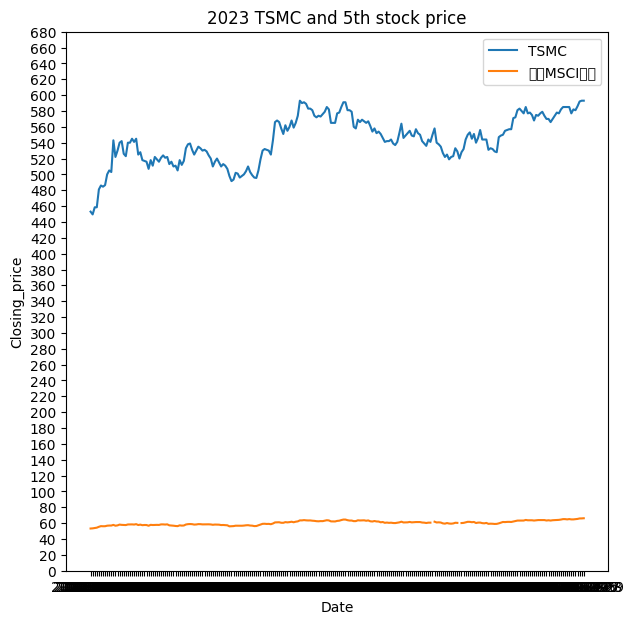

In [15]:
data_TSMC = stockData[stockData['name'] == '台積電'].reset_index(drop= True)

data_corr = pd.DataFrame()
companies = stockData['name'].drop_duplicates()
data_corr['company'] = companies
data_corr['corr'] = 0

def get_Corr(company):
    data_company = stockData[stockData['name'] == company].reset_index(drop = True)
    return data_TSMC['closing_price'].corr(data_company['closing_price'])

data_corr['corr'] = data_corr['company'].apply(get_Corr)
data_corr = data_corr.sort_values('corr', ascending=False)

ans_company = data_corr.iloc[4:5].iat[0, 0]
data_ans = stockData[stockData['name'] == ans_company].reset_index(drop = True)
data_TSMC_ans = pd.merge(data_TSMC[['date', 'closing_price']], data_ans[['date', 'closing_price']], on='date', suffixes=('_TSMC', f'_{ans_company}')).set_index('date')

print("2023年 與台積電絕對相關度排行第5名的股票為: ", ans_company)
plt.figure(figsize=(7, 7))
plt.plot(data_TSMC_ans['closing_price_TSMC'], label = 'TSMC')
plt.plot(data_TSMC_ans[f'closing_price_{ans_company}'], label = ans_company)
plt.yticks(np.arange(0, 700, 20))
plt.legend(loc = 'best')
plt.xlabel("Date")
plt.ylabel("Closing_price")
plt.title(f"2023 TSMC and 5th stock price")
plt.show()